# 1. Data Aquisition  
# 2. Data Preprocessing  
# 3. Exploratory Data Analysis (EDA)   
# 4. Feature Selection  / Feature Engineering (create new columns)  
# 5. Model Selection (which one is the best?)  
# 6. Model Validation  
# 7. If test presents poor results, go back to step 3 and 4  


In [1320]:
#### Import modules ###
from sklearn import tree
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import waterfall_chart
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [1321]:
### Create dataframe using CSV ###

df = pd.read_csv(os.path.join("..","Resources", "last_five_years.csv"))
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20031 entries, 0 to 20030
Data columns (total 44 columns):
BATHRM                20031 non-null int64
HF_BATHRM             20031 non-null int64
HEAT                  20031 non-null object
AC                    20031 non-null object
NUM_UNITS             20031 non-null int64
ROOMS                 20031 non-null int64
BEDRM                 20031 non-null int64
STORIES               20031 non-null float64
SALEDATE              20031 non-null object
PRICE                 20031 non-null int64
QUALIFIED             20031 non-null object
SALE_NUM              20031 non-null int64
GBA                   20031 non-null int64
BLDG_NUM              20031 non-null int64
STYLE                 20031 non-null object
STRUCT                20031 non-null object
GRADE                 20031 non-null object
CNDTN                 20031 non-null object
EXTWALL               20031 non-null object
ROOF                  20031 non-null object
INTWALL            

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1322]:
###Counting the number of years to check data ####

# df = df[df.SALEYEAR != 2018]
# df = df[df.SALEYEAR != 2014]

df["SALEYEAR"].nunique()

5

In [1323]:
## Show correlations between variables within the dataframe ##

df.corr()
df1 = df

df1 = df1[df1.ADJ_SALES_PRICE < 1600000]
df1 = df1[df1.ADJ_SALES_PRICE > 175000]
df1.shape

(17967, 44)

In [1324]:
# Drop ADJ_SALES_PRICE because it represents our dependent variable Y and drop other columns that don't improve the model #

X = df1.drop(columns=["PRICE", #is my Y
                      "CENSUS_TRACT", #makes model worse
                      "SALEDATE",
                      "SOURCE", #they are all the same value 'Residential'
                      "FULLADDRESS",
                      "CITY", #is all in DC
                      "STATE", #is all in the same state
                      "NATIONALGRID", #uniquie id to each house
                      "ASSESSMENT_SUBNBHD", #there are 121, mayby too many, worth re-running the model with it
                      "CENSUS_BLOCK", #there are 2K
                      "SQUARE", #there are 3K
                      'SALE_NUM',
                      'WARD',
                      "QUADRANT", # there are only 'NW', 'SW', 'SE', 'NE', nan, maybe work using it but with Zipcode it seems redundant
                      "QUALIFIED",
                      #these ones were removed after looking at the 'feature importance' in the Random Forrest
                       "STYLE",
                      "ROOF",
                      "HEAT",
                      "EXTWALL",
                      "ASSESSMENT_NBHD",
                      "ADJ_SALES_PRICE",
                      "ROOMS",
                      "LANDAREA",
                      "BLDG_NUM",
                      "NUM_UNITS",
                      "SALEYEAR",
                      "STORIES"
                      
                    
                     ])

#set price to be y
# y = df1["PRICE"]
y = df1["ADJ_SALES_PRICE"]

In [1325]:
# Replace 'No Data' and 'Deafult' with numpy 'nan'
df1 = df1.replace('No Data',np.nan)
df1 = df1.replace('Default',np.nan)


In [1326]:
## Show independent variables (X axis) ##

X.head()
X.columns

Index(['BATHRM', 'HF_BATHRM', 'AC', 'BEDRM', 'GBA', 'STRUCT', 'GRADE', 'CNDTN',
       'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'ZIPCODE', 'LATITUDE',
       'LONGITUDE', 'TOT_ROOMS', 'ROOM_TO_LAND'],
      dtype='object')

In [1327]:
# ZIPCODE is categorical but because it is made of numbers before using dummies function need to convert to string type
df1['ZIPCODE'] = df1['ZIPCODE'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17967 entries, 1 to 20029
Data columns (total 44 columns):
BATHRM                17967 non-null int64
HF_BATHRM             17967 non-null int64
HEAT                  17960 non-null object
AC                    17967 non-null object
NUM_UNITS             17967 non-null int64
ROOMS                 17967 non-null int64
BEDRM                 17967 non-null int64
STORIES               17967 non-null float64
SALEDATE              17967 non-null object
PRICE                 17967 non-null int64
QUALIFIED             17967 non-null object
SALE_NUM              17967 non-null int64
GBA                   17967 non-null int64
BLDG_NUM              17967 non-null int64
STYLE                 17956 non-null object
STRUCT                17966 non-null object
GRADE                 17967 non-null object
CNDTN                 17966 non-null object
EXTWALL               17966 non-null object
ROOF                  17967 non-null object
INTWALL            

In [1328]:
# handling categorical variables
# use pd.get_dummies

X = pd.get_dummies(X)


In [1329]:
# use unique() to see what type of value in each column, then drop the column if not needed
df1["QUADRANT"].unique()

array(['NW', 'SW', 'SE', 'NE', nan], dtype=object)

In [1330]:
# use nunique() to count the number of uniquie categories. E.g. 3K cathegories make a column useless in a 20K dataset
df1["QUADRANT"].nunique()

4

In [1331]:
# Generate model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

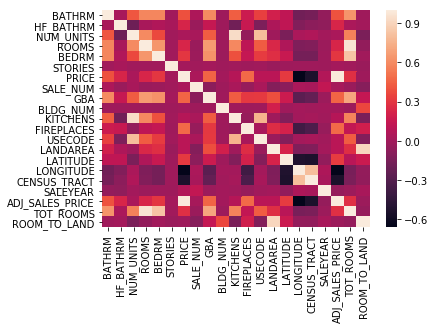

In [1332]:
## Show heatmap of correlations between variables ##
sns.heatmap(df1.corr())

In [1333]:
# Check that we are using 20% of the dataset for testing
len(X_test)/len(X)

0.20003339455668726

In [1334]:
## Import Random Forest module ##

from sklearn.ensemble import RandomForestRegressor

In [1335]:
# Initialize the model
model = LinearRegression()
#rf_model = RandomForestRegressor() #runs with default value
rf_model = RandomForestRegressor(max_depth= 35) #https://scikit-learn.org/stable/modules/grid_search.html


In [1336]:
# Train the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1337]:
## Fit training data into model

rf_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [1338]:
# Make predictions

# Linear regression
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Forrest Tree
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [1339]:
# Model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [1340]:
## Print training & test scores for linear regression ##
print('The r-squared for training is: ', r2_score(y_train, y_train_pred))
print('The r-squared for testing is: ', r2_score(y_test, y_test_pred))

The r-squared for training is:  0.7549586259649217
The r-squared for testing is:  0.7648320686148729


In [1341]:
## Print training & test scores for Random forest ##

print('The r-squared for training is: ', r2_score(y_train, y_train_pred_rf))
print('The r-squared for testing is: ', r2_score(y_test, y_test_pred_rf))

The r-squared for training is:  0.9703559921015315
The r-squared for testing is:  0.8486068742492197


In [1342]:
## Find mean squared error for Random forest ##

print('The RMSE for training is : ', np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print('The RMSE for test is : ', np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))

The RMSE for training is :  56868.11065899553
The RMSE for test is :  129659.75905679443


In [1343]:
## Create dataframe with independent variables which carried most weight to price prediction ##

feature_df = pd.DataFrame({"feature_name":X.columns.values,"importance":rf_model.feature_importances_}).sort_values("importance", ascending=False)
feature_df.head(5)


,feature_name,importance
9,LONGITUDE,0.354930
7,ZIPCODE,0.251181
3,GBA,0.126767
8,LATITUDE,0.092652
32,CNDTN_Average,0.033178


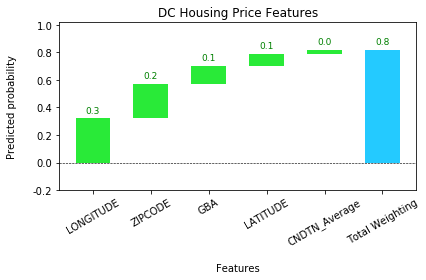

In [1344]:
## Create waterfall chart

a = ["LONGITUDE", "ZIPCODE", "GBA","LATITUDE", "CNDTN_Average"]
b = [0.32, 0.25, 0.13, 0.09, .03]
plot = waterfall_chart.plot(a,b, Title= "DC Housing Price Features", y_lab= "Predicted probability", x_lab= "Features",
 net_label = "Total Weighting")
plot.show()

In [1345]:
### Model price prediction ##

y.mean()

711225.3290827405

In [1346]:
## Mean squared error of price prediction ##

from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test,y_test_pred))

161599.93503149072

<Figure size 7200x43416 with 0 Axes>

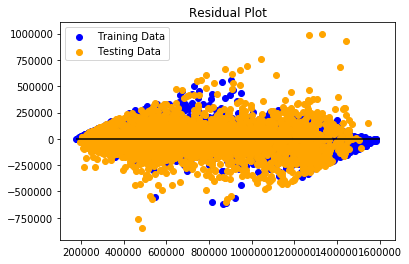

<Figure size 7200x43416 with 0 Axes>

In [1347]:
## Create residual plot #

plt.scatter(rf_model.predict(X_train), rf_model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(rf_model.predict(X_test), rf_model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

plt.figure(figsize=(100,603))

